In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv("../data/processed/online_retail_cleaned.csv")

# Ensure date type
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")


## Business Insights

This notebook generates executive-level insights from marketplace transaction data.

Key analyses include:
- Revenue concentration by SKU to identify dependency risk
- Repeat customer behavior as a retention proxy
- Monthly revenue trends to assess seasonality and demand patterns


In [4]:
# Revenue concentration by SKU (Pareto analysis)
sku_revenue = (
    df.groupby("StockCode")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

top_20_pct = int(len(sku_revenue) * 0.2)
revenue_share = sku_revenue.head(top_20_pct).sum() / sku_revenue.sum()

print(f"Top 20% of SKUs generate {revenue_share:.2%} of total revenue")


Top 20% of SKUs generate 78.65% of total revenue


In [5]:
# Repeat customer analysis (2+ purchases)
orders_per_customer = df.groupby("CustomerID")["InvoiceNo"].nunique()
repeat_rate = (orders_per_customer >= 2).mean()

print(f"Repeat customer rate (2+ orders): {repeat_rate:.2%}")


Repeat customer rate (2+ orders): 65.58%


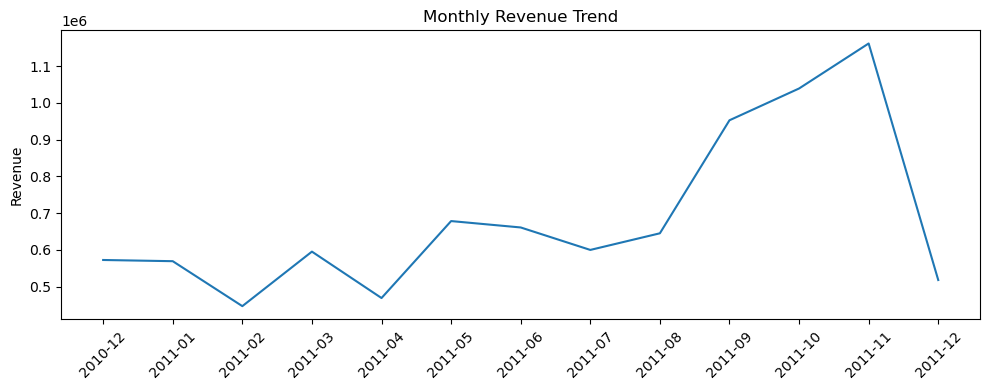

In [6]:
# Monthly revenue trend
monthly_revenue = (
    df.groupby(df["order_date"].dt.to_period("M"))["revenue"]
    .sum()
)

monthly_revenue.index = monthly_revenue.index.astype(str)

plt.figure(figsize=(10,4))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()
